# Visualization and analysis of results

In [1]:
%load_ext autoreload
%autoreload 2

In [53]:
import beadfinder
bf = beadfinder.BeadFinder('config.yml')


Source folder accessible? True
Destination folder accessible? True
Slide2_A3.nd2
Slide2_A1.nd2
Slide2_B1.nd2
Slide1_B3.nd2
Slide1_A4_aborted.nd2
Slide1_A3.nd2
Slide1_A2.nd2
Slide1_A2_aborted.nd2
Slide1_A3_alt_lasersettings.nd2
Slide1_A4.nd2
Slide1_A1.nd2
Discovered 420 positions in 11 files.


In [25]:
row = bf.filelist[(bf.filelist['name'] == 'Slide2_A1.nd2')  & (bf.filelist['fov']==28)].iloc[0]

## Visualization with napari

In [26]:
import napari
#row = bf.get_item(44)
img, spacing = bf.load_image(row)
labels = bf.load_labels(row)
v = napari.view_image(img,channel_axis=1,scale=spacing)
v.add_labels(labels[0],name='cells',scale=spacing)
v.add_labels(labels[1],name='beads',scale=spacing)

<Labels layer 'beads' at 0x7f32ae5839d0>

## Visualization in 2D

(-0.5, 1411.5, 1411.5, -0.5)

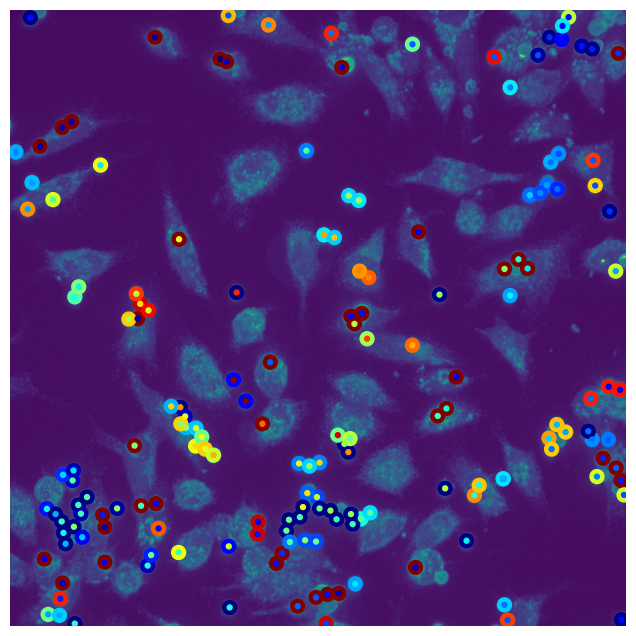

In [17]:
import matplotlib.pyplot as plt
import numpy as np
beads_df = bf.load_beads_dataframe(row)
plt.figure(figsize=(8,8))
plt.imshow(np.log(np.amax(img[:,2],0)))
plt.scatter(beads_df["X"] / spacing[1], beads_df["Y"] / spacing[2],c=beads_df["Fraction_inside"],cmap='jet',marker='.',s=400)
plt.scatter(beads_df["X"] / spacing[1], beads_df["Y"] / spacing[2],c=beads_df["Mean_intensity_ch3"],cmap='jet',marker='.',s=50)
plt.axis('off')

## Fraction inside vs intensity in 4th channel

<Axes: xlabel='Fraction_inside', ylabel='Mean_intensity_ch3'>

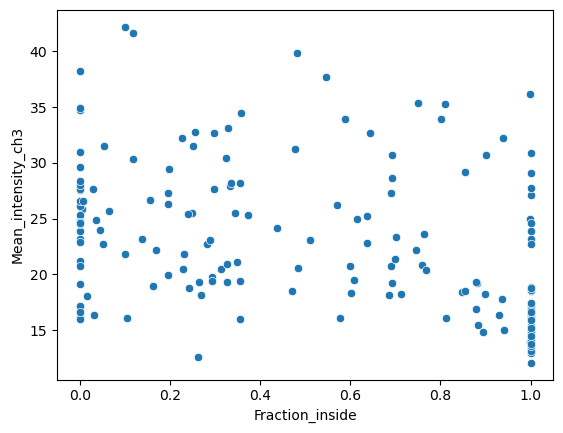

In [39]:
import seaborn as sns
sns.scatterplot(data=beads_df, x='Fraction_inside', y='Mean_intensity_ch3')


## Load results from all files and positions

In [51]:
beads = bf.load_all_beads_dataframe()

,folder,name,fov
0,/media/cephfs2/mlaub/20230511 bSaporin,Slide2_A3.nd2,0
1,/media/cephfs2/mlaub/20230511 bSaporin,Slide2_A3.nd2,1
2,/media/cephfs2/mlaub/20230511 bSaporin,Slide2_A3.nd2,2
3,/media/cephfs2/mlaub/20230511 bSaporin,Slide2_A3.nd2,3
4,/media/cephfs2/mlaub/20230511 bSaporin,Slide2_A3.nd2,4
...,...,...,...
415,/media/cephfs2/mlaub/20230511 bSaporin,Slide1_A1.nd2,44
416,/media/cephfs2/mlaub/20230511 bSaporin,Slide1_A1.nd2,45
417,/media/cephfs2/mlaub/20230511 bSaporin,Slide1_A1.nd2,46
418,/media/cephfs2/mlaub/20230511 bSaporin,Slide1_A1.nd2,47


<Axes: xlabel='Fraction_inside', ylabel='Mean_intensity_ch3'>

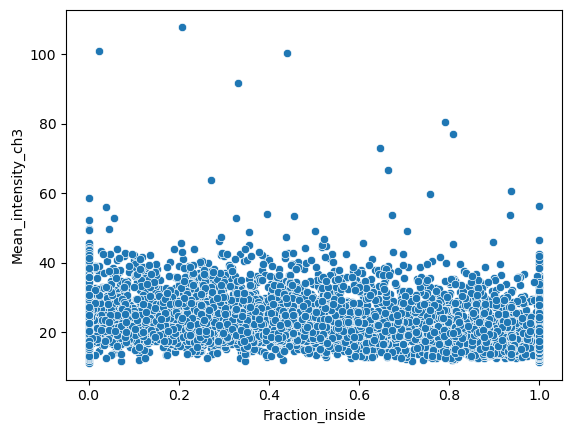

In [73]:
sns.scatterplot(data=beads, x='Fraction_inside', y='Mean_intensity_ch3')

<Axes: xlabel='Mean_intensity_ch1', ylabel='name'>

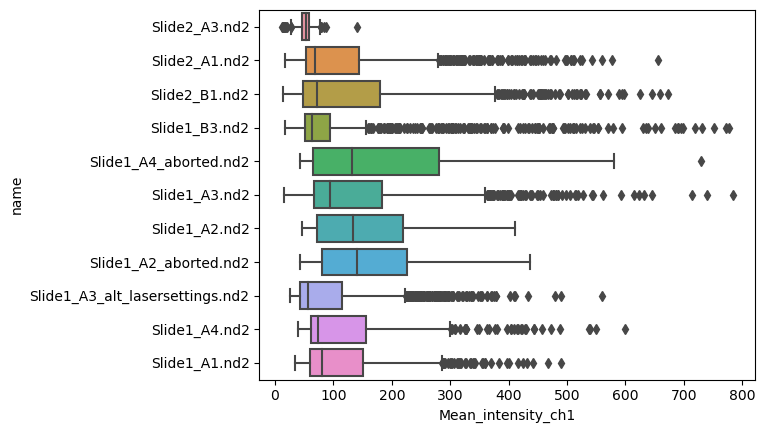

In [74]:
sns.boxplot(data=beads, y='name', x='Mean_intensity_ch1')